# Participação 8

## Exercício 1 
Faça os exercícios de aprendizado LC10.1 e LC10.2 relacionados à análise de regressão, conforme proposto em [38]. Verifique suas respostas no apêndice D do mesmo livro.

## Exercício 2

Ajuste um modelo de regressão linear múltipla para prever a altura das crianças *Ĥ* (Altura) do conjunto de dados GaltonFamilies com base na altura do pai (Father), altura da mãe (Mother) e gênero (Gender). Em outras palavras, o modelo de regressão deve ser expresso da seguinte forma:

*Ĥ* = b0 + b1mother + b2father + b3gender.

As alturas estão em polegadas e o gênero é codificado binariamente, onde o sexo masculino é representado por 0 e o sexo feminino por 1. Avalie visualmente a adequabilidade do modelo obtido aos dados observados.

In [2]:
from plotnine import *
import pandas as pd


In [3]:
evals_df = pd.read_csv("evals.csv")
evals_df.head()

,ID,prof_ID,score,age,bty_avg,gender,ethnicity,language,rank,pic_outfit,pic_color,cls_did_eval,cls_students,cls_level
0,1,1,4.7,36,5.0,female,minority,english,tenure track,not formal,color,24,43,upper
1,2,1,4.1,36,5.0,female,minority,english,tenure track,not formal,color,86,125,upper
2,3,1,3.9,36,5.0,female,minority,english,tenure track,not formal,color,76,125,upper
3,4,1,4.8,36,5.0,female,minority,english,tenure track,not formal,color,77,123,upper
4,5,2,4.6,59,3.0,male,not minority,english,tenured,not formal,color,17,20,upper


In [4]:
evals_df = evals_df[["ID","score","bty_avg","age"]]
evals_df.head()

,ID,score,bty_avg,age
0,1,4.7,5.0,36
1,2,4.1,5.0,36
2,3,3.9,5.0,36
3,4,4.8,5.0,36
4,5,4.6,3.0,59


In [5]:
evals_df.shape

(463, 4)

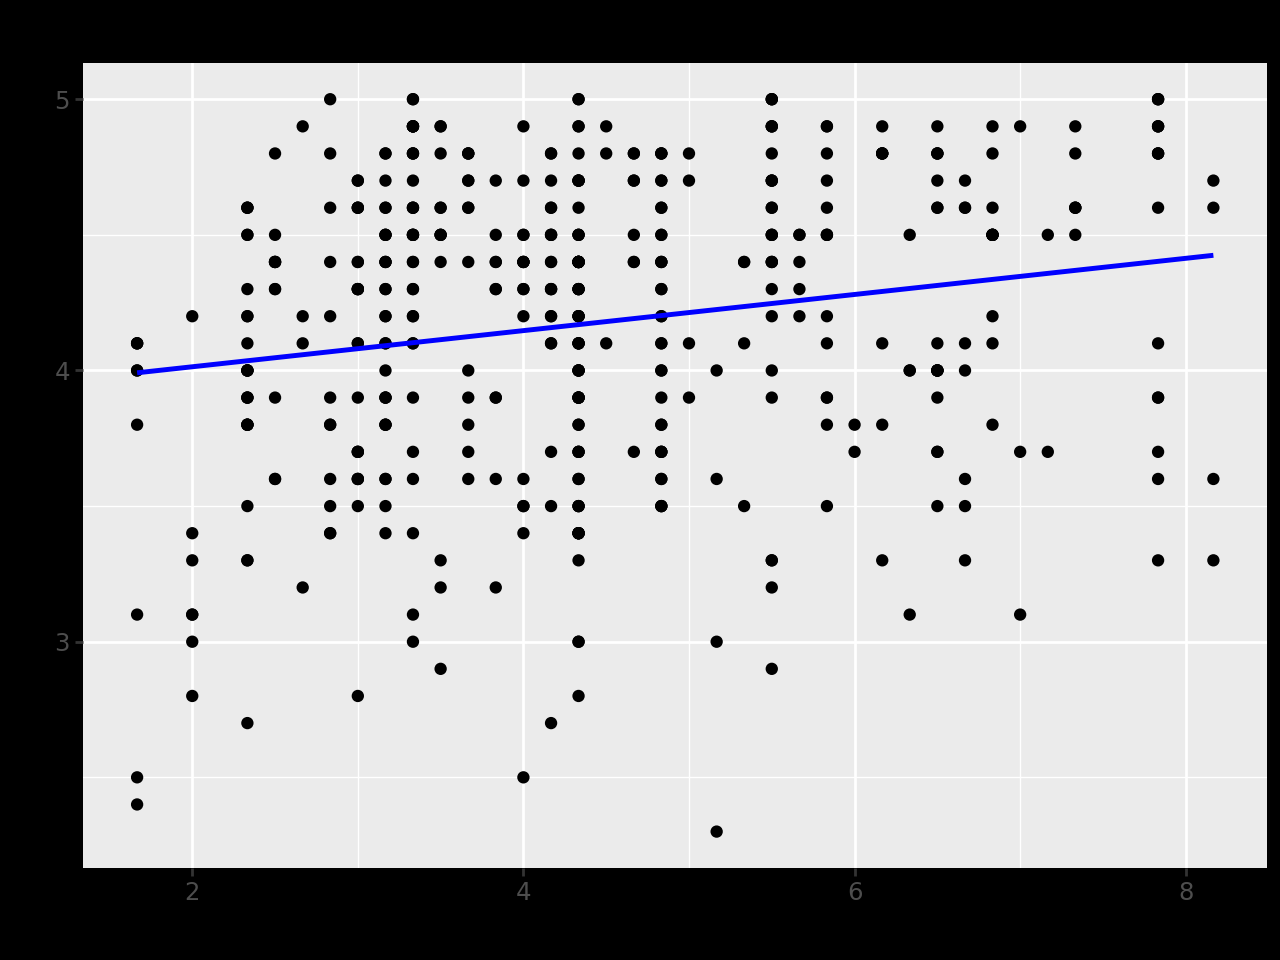

In [6]:
ggplot(evals_df) \
+ aes(x = "bty_avg", y = "score") \
+ geom_point() \
+ labs(x = "Beauty Score", 
       y = "Teaching Score",
       title = "Relationship between teaching and beauty scores") \
+ geom_smooth(method="lm", se = False, color = "blue")

In [7]:
# !pip install statsmodels

In [8]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [9]:
score_model = smf.ols("score ~ bty_avg", data=evals_df).fit()

In [10]:
regression_table = score_model.summary()
regression_table

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     16.73
Date:                Fri, 07 Jun 2024   Prob (F-statistic):           5.08e-05
Time:                        09:38:38   Log-Likelihood:                -366.22
No. Observations:                 463   AIC:                             736.4
Df Residuals:                     461   BIC:                             744.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8803      0.076     50.961      0.000       3.731       4.030
bty_avg        0.0666      0.016      4.090      0.000       0.035       0.099
==============================================================================
Omnibus:                       33.007   Durbin-Watson:                   1.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.797
Skew:                          -0.709   Prob(JB):                     3.76e-09
Kurtosis:                       3.007   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
regression_table_df = pd.DataFrame({
    'estimate': score_model.params,
    'std_error': score_model.bse,
    'statistic': score_model.tvalues,
    'p_value': score_model.pvalues,
    'lower_ci': score_model.conf_int()[0],
    'upper_ci': score_model.conf_int()[1],
})
regression_table_df

,estimate,std_error,statistic,p_value,lower_ci,upper_ci
Intercept,3.880338,0.076143,50.961212,1.561043e-191,3.730708,4.029968
bty_avg,0.066637,0.016291,4.090382,5.082731e-05,0.034623,0.098651


In [12]:
evals_df['score_hat'] = score_model.fittedvalues
evals_df['residual'] = score_model.resid

regression_points_df = evals_df[['ID', 'score', 'bty_avg', 'score_hat', 'residual']]
regression_points_df

,ID,score,bty_avg,score_hat,residual
0,1,4.7,5.000,4.213523,0.486477
1,2,4.1,5.000,4.213523,-0.113523
2,3,3.9,5.000,4.213523,-0.313523
3,4,4.8,5.000,4.213523,0.586477
4,5,4.6,3.000,4.080249,0.519751
...,...,...,...,...,...
458,459,4.5,6.833,4.335669,0.164331
459,460,3.5,5.333,4.235713,-0.735713
460,461,4.4,5.333,4.235713,0.164287
461,462,4.4,5.333,4.235713,0.164287


In [13]:
evals_df = pd.read_csv("evals.csv")
evals_df = evals_df[['ID','prof_ID','score','bty_avg']]
evals_df

,ID,prof_ID,score,bty_avg
0,1,1,4.7,5.000
1,2,1,4.1,5.000
2,3,1,3.9,5.000
3,4,1,4.8,5.000
4,5,2,4.6,3.000
...,...,...,...,...
458,459,93,4.5,6.833
459,460,94,3.5,5.333
460,461,94,4.4,5.333
461,462,94,4.4,5.333


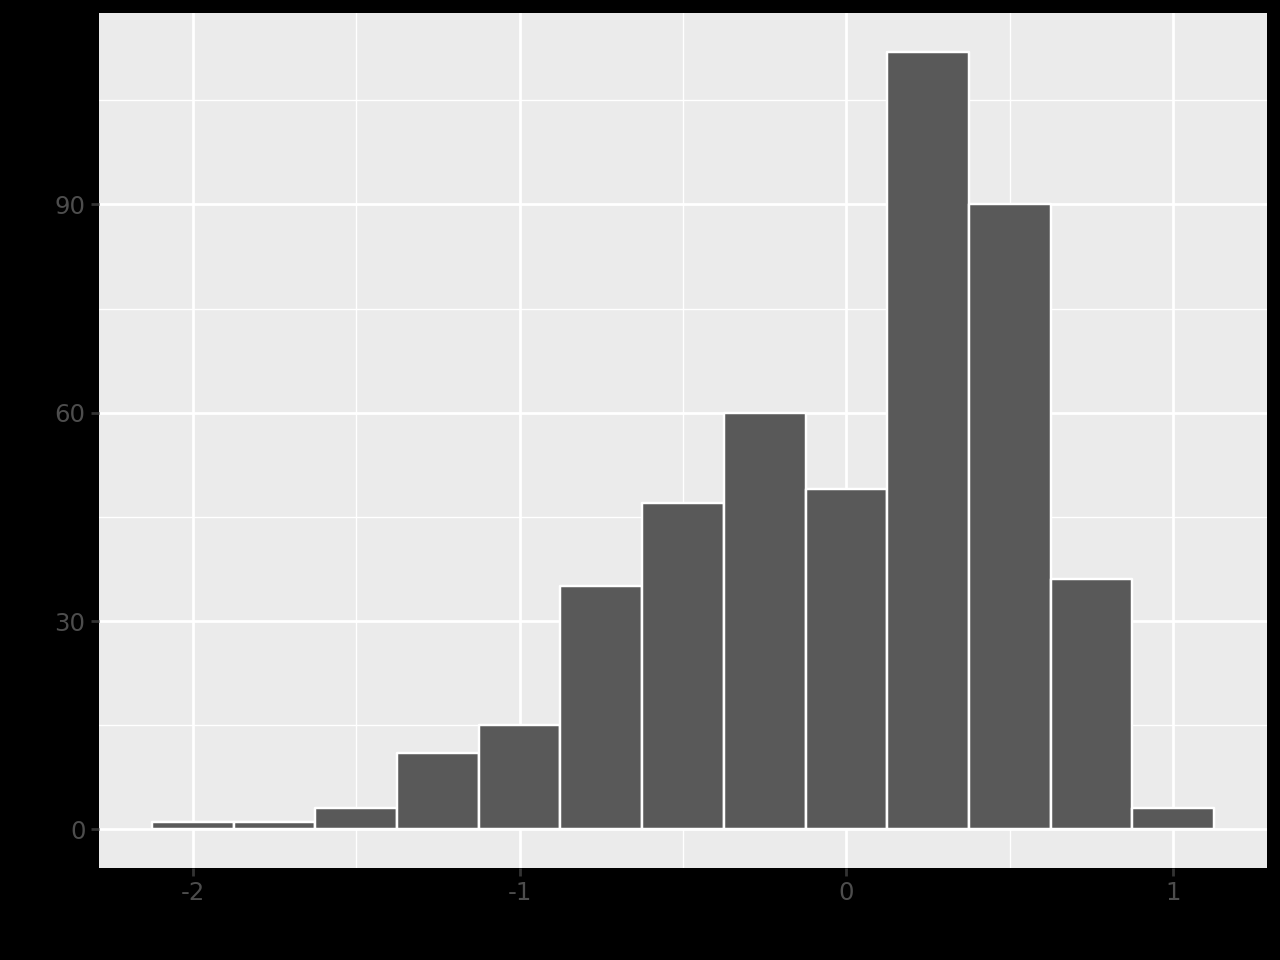

In [14]:
ggplot(regression_points_df) \
+ aes(x = "residual") \
+ geom_histogram(binwidth=0.25,color = "white") \
+ labs(x = "Residual")

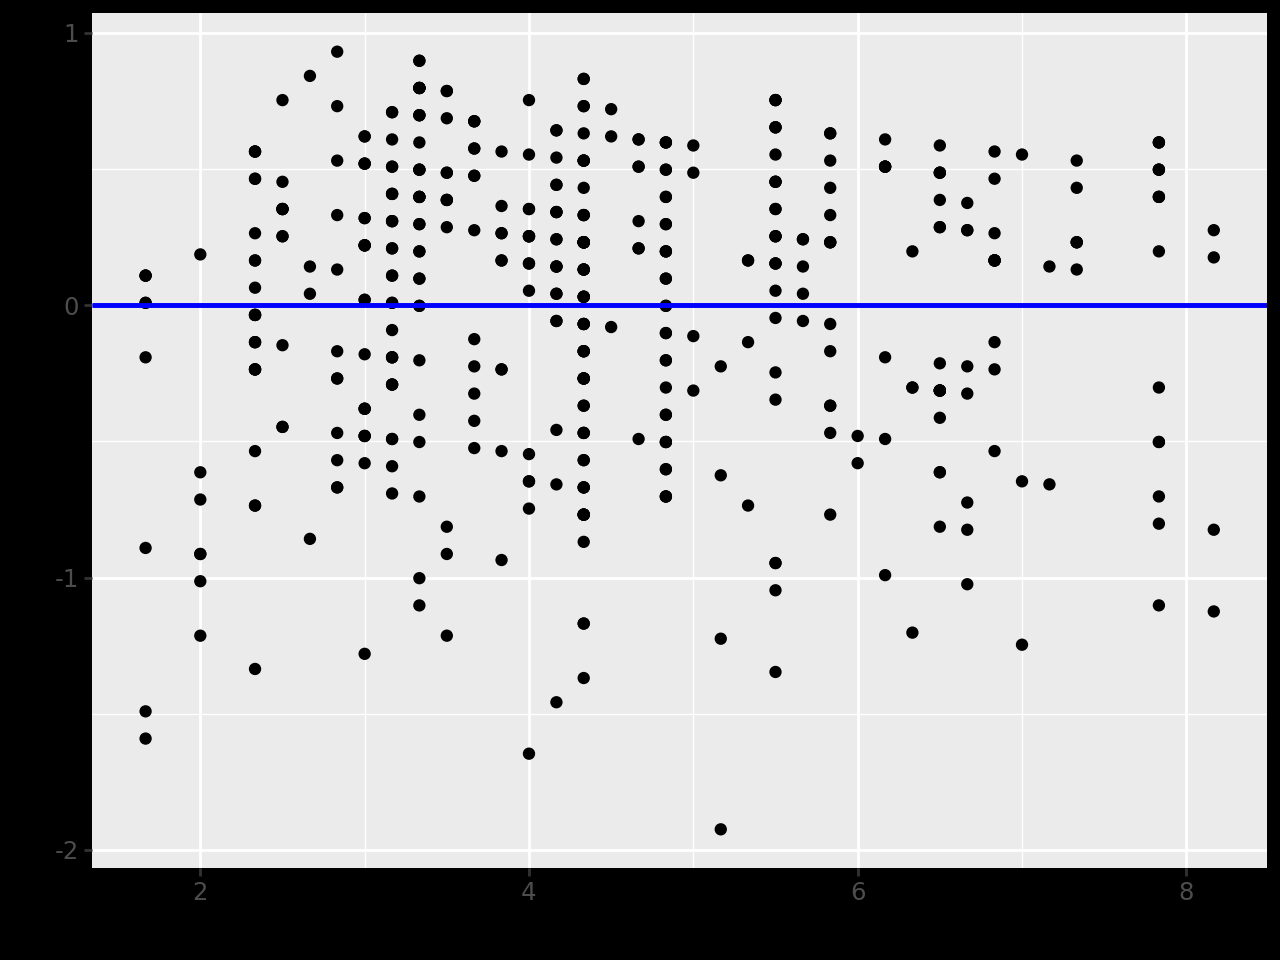

In [15]:
ggplot(regression_points_df) \
+ aes(x = "bty_avg", y = "residual") \
+ geom_point() \
+ labs(x = "Beauty Score", y = "Residual") \
+ geom_hline(yintercept = 0, color = "blue", size = 1)


LC10.1

In [16]:
evals_df = pd.read_csv("evals.csv")
evals_df = evals_df[["ID","score","bty_avg","age"]]
evals_df.head()

,ID,score,bty_avg,age
0,1,4.7,5.0,36
1,2,4.1,5.0,36
2,3,3.9,5.0,36
3,4,4.8,5.0,36
4,5,4.6,3.0,59


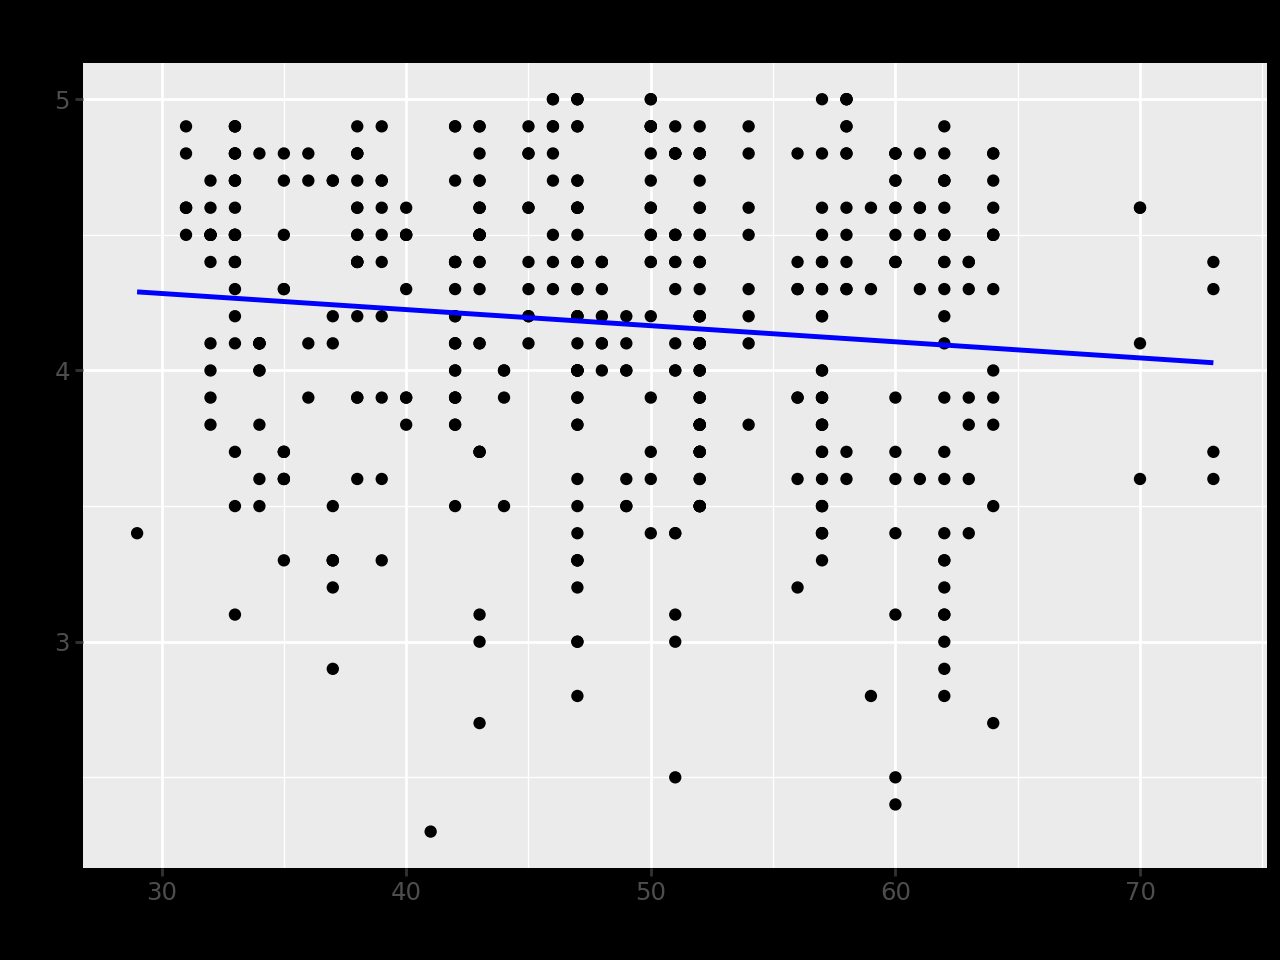

In [18]:
ggplot(evals_df) \
+ aes(x = "age", y = "score") \
+ geom_point() \
+ labs(x = "Age", 
       y = "Teaching Score",
       title = "Relationship between teaching and age",
       color = "white") \
+ geom_smooth(method="lm", se = False, color = "blue")

In [20]:
score_model = smf.ols("score ~ age", data=evals_df).fit()
score_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     5.342
Date:                Fri, 07 Jun 2024   Prob (F-statistic):             0.0213
Time:                        09:40:59   Log-Likelihood:                -371.81
No. Observations:                 463   AIC:                             747.6
Df Residuals:                     461   BIC:                             755.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4619      0.127     35.195      0.000       4.213       4.711
age           -0.0059      0.003     -2.311      0.021      -0.011      -0.001
==============================================================================
Omnibus:                       30.047   Durbin-Watson:                   1.211
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.658
Skew:                          -0.670   Prob(JB):                     2.98e-08
Kurtosis:                       3.032   Cond. No.                         249.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
regression_table_df = pd.DataFrame({
    'estimate': score_model.params,
    'std_error': score_model.bse,
    'statistic': score_model.tvalues,
    'p_value': score_model.pvalues,
    'lower_ci': score_model.conf_int()[0],
    'upper_ci': score_model.conf_int()[1],
})
regression_table_df

,estimate,std_error,statistic,p_value,lower_ci,upper_ci
Intercept,4.461932,0.126778,35.194709,1.052874e-132,4.212797,4.711068
age,-0.005938,0.002569,-2.311351,2.125363e-02,-0.010987,-0.000890


In [22]:
evals_df['score_hat'] = score_model.fittedvalues
evals_df['residual'] = score_model.resid

regression_points_df = evals_df[['ID', 'score', 'age', 'score_hat', 'residual']]
regression_points_df

,ID,score,age,score_hat,residual
0,1,4.7,36,4.248156,0.451844
1,2,4.1,36,4.248156,-0.148156
2,3,3.9,36,4.248156,-0.348156
3,4,4.8,36,4.248156,0.551844
4,5,4.6,59,4.111577,0.488423
...,...,...,...,...,...
458,459,4.5,32,4.271909,0.228091
459,460,3.5,42,4.212527,-0.712527
460,461,4.4,42,4.212527,0.187473
461,462,4.4,42,4.212527,0.187473


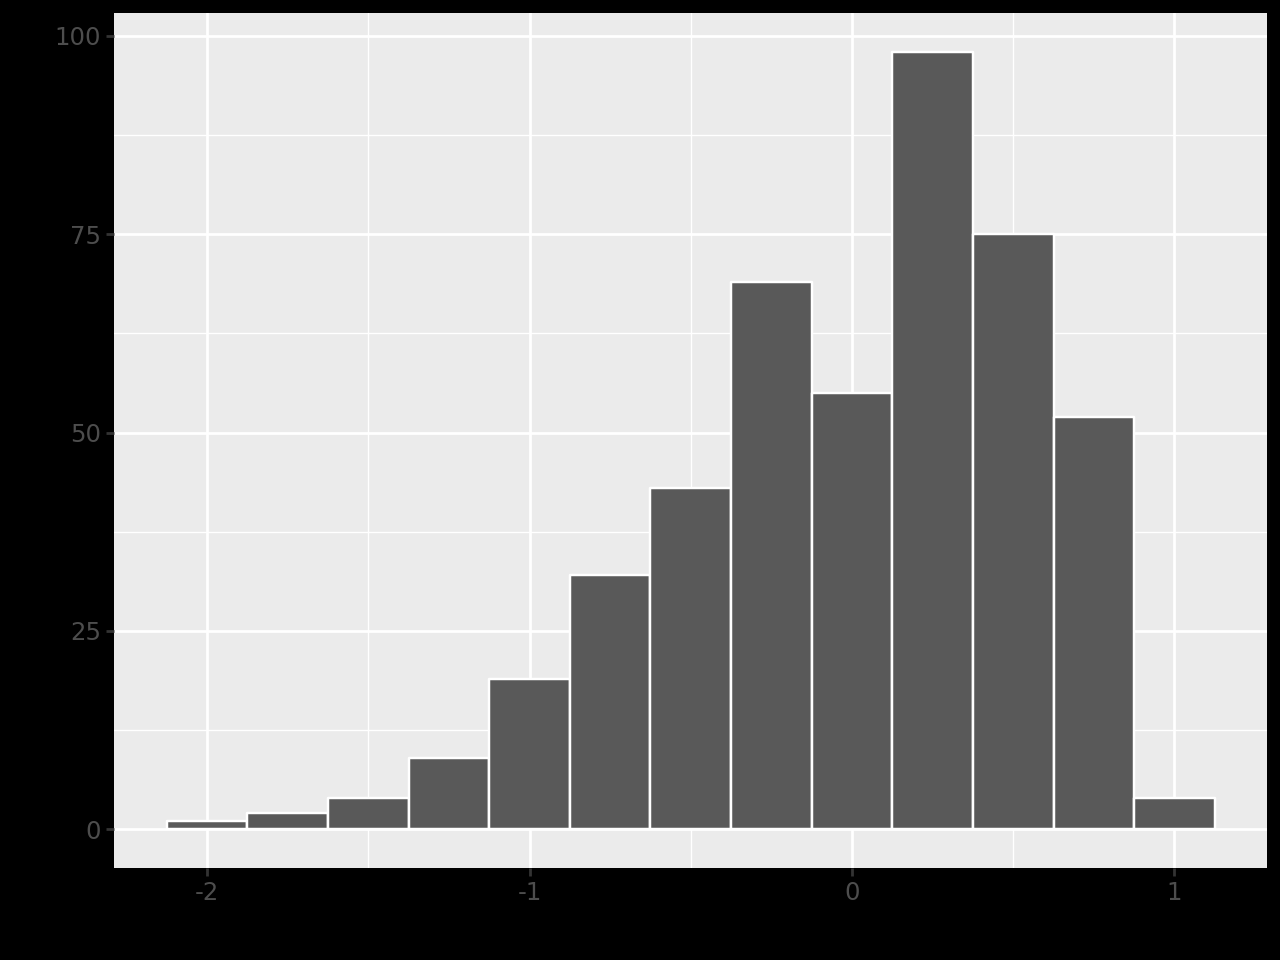

In [23]:
ggplot(regression_points_df) \
+ aes(x = "residual") \
+ geom_histogram(binwidth=0.25,color = "white") \
+ labs(x = "Residual")

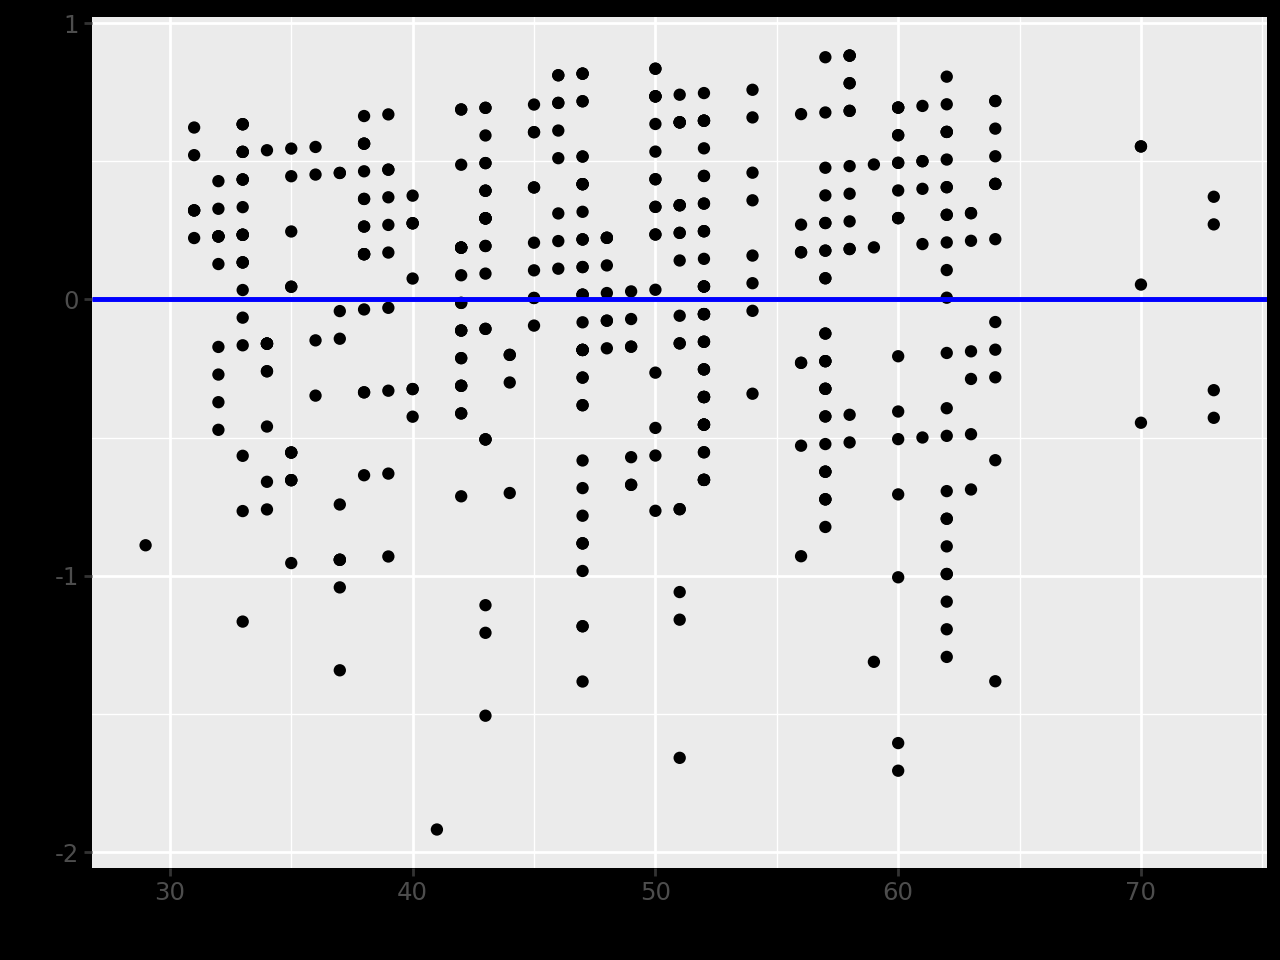

In [25]:
ggplot(regression_points_df) \
+ aes(x = "age", y = "residual") \
+ geom_point() \
+ labs(x = "Age") \
+ geom_hline(yintercept = 0, color = "blue", size = 1)


LC10.2